<a href="https://colab.research.google.com/github/dongnt-1904/UEH-KTLT-ECO25/blob/D%E1%BB%B1-%C3%A1n-cu%E1%BB%91i-k%E1%BB%B3/Ti%E1%BB%81n_x%E1%BB%AD_l%C3%BD_d%E1%BB%AF_li%E1%BB%87u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dự án cuối kỳ - Loan Data

## 1. Mô tả bộ dữ liệu

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc dữ liệu từ file CSV
from google.colab import files
uploaded = files.upload()
print("Đã đọc file thành công! Kích thước dữ liệu:")

Saving loan_data.csv to loan_data.csv
Đã đọc file thành công! Kích thước dữ liệu:


In [4]:
#Xem nhanh bộ dữ liệu
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
#Xem thông tin bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## 2. Tiền xử lý dữ liệu

### 2.1. Làm sạch dữ liệu

#### 2.1.1 Xử lý Missing value




In [6]:
# 1. Tính tổng số lượng giá trị thiếu cho mỗi cột
missing_count = df.isnull().sum()

# 2. Tính tỷ lệ phần trăm giá trị thiếu
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100

# 3. Tạo một DataFrame tổng hợp
missing_data = pd.DataFrame({
    'Số lượng thiếu': missing_count,
    'Tỷ lệ thiếu (%)': missing_percentage.round(2)
})
missing_data

,Số lượng thiếu,Tỷ lệ thiếu (%)
credit.policy,0,0.0
purpose,0,0.0
int.rate,0,0.0
installment,0,0.0
log.annual.inc,0,0.0
dti,0,0.0
fico,0,0.0
days.with.cr.line,0,0.0
revol.bal,0,0.0
revol.util,0,0.0


#### 2.1.2. Xử lý giá trị trùng lặp

In [7]:
# 2. Tính tổng số hàng trùng lặp
total_duplicates = df.duplicated().sum()
# 3. Hiển thị kết quả
if total_duplicates == 0:
    print("Bộ dữ liệu không có hàng nào bị trùng lặp hoàn toàn.")
else:
    print(f"Bộ dữ liệu có {total_duplicates} hàng bị trùng lặp hoàn toàn.")

Bộ dữ liệu không có hàng nào bị trùng lặp hoàn toàn.


#### 2.1.3. Xử lý Outliers

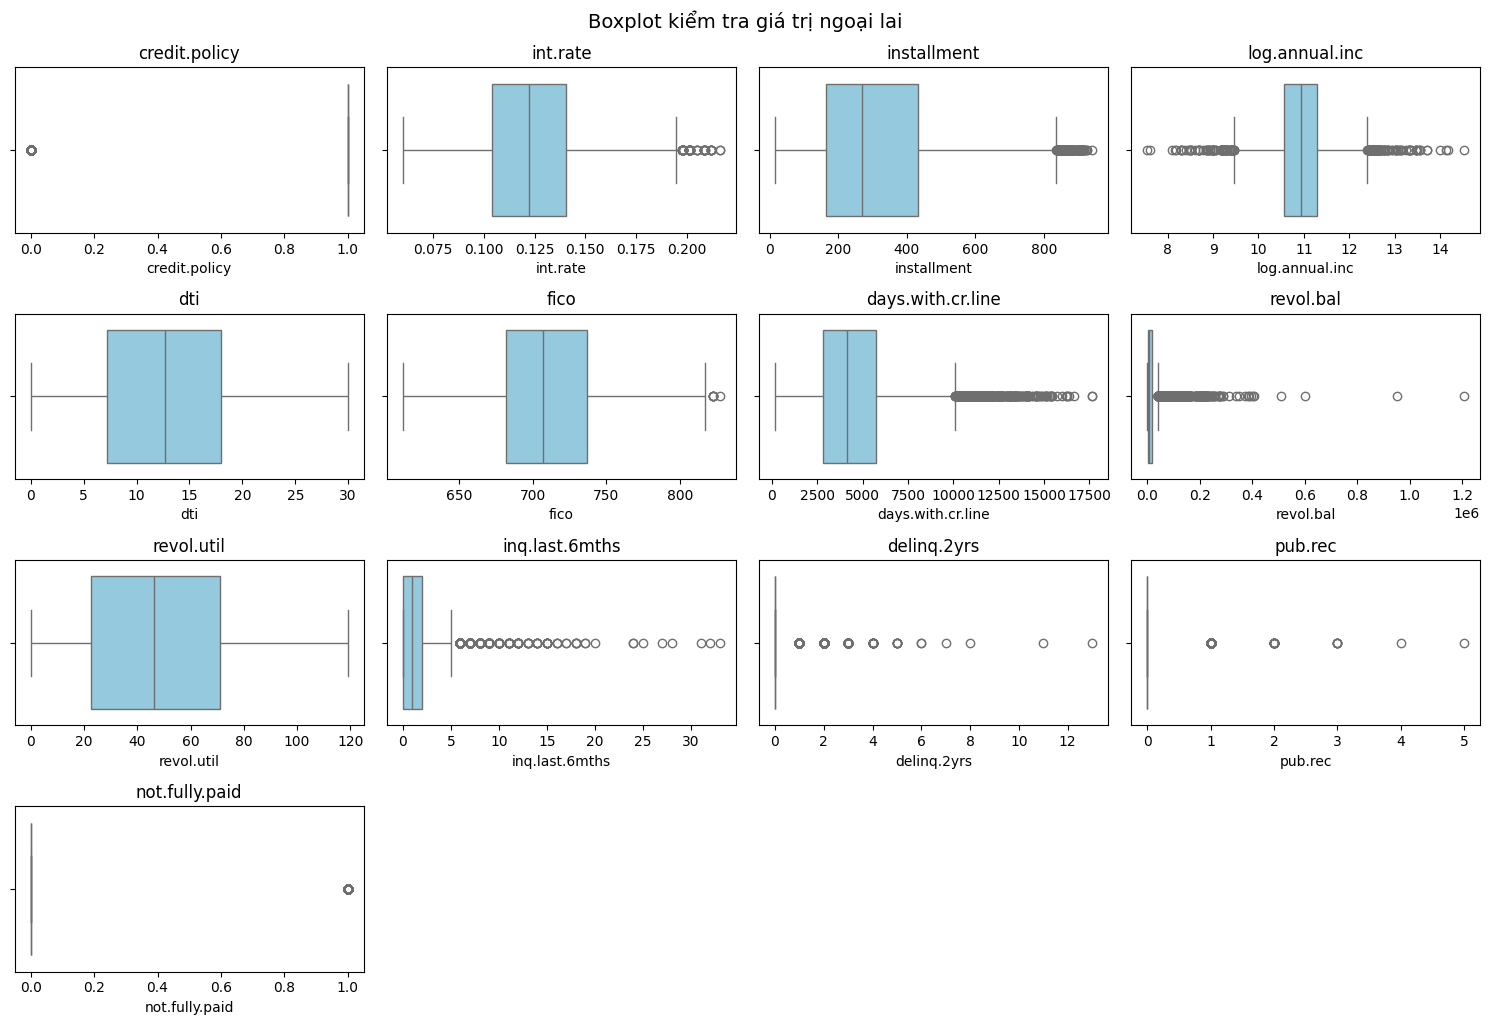

In [8]:
#Kiểm tra sơ bộ bằng biểu đồ Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Lấy danh sách các biến số
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Tạo bố cục biểu đồ
plt.figure(figsize=(15, 10))
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)
# Dùng vòng lặp để vẽ biểu đồ
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplot kiểm tra giá trị ngoại lai", fontsize=14, y=1.02)
plt.show()

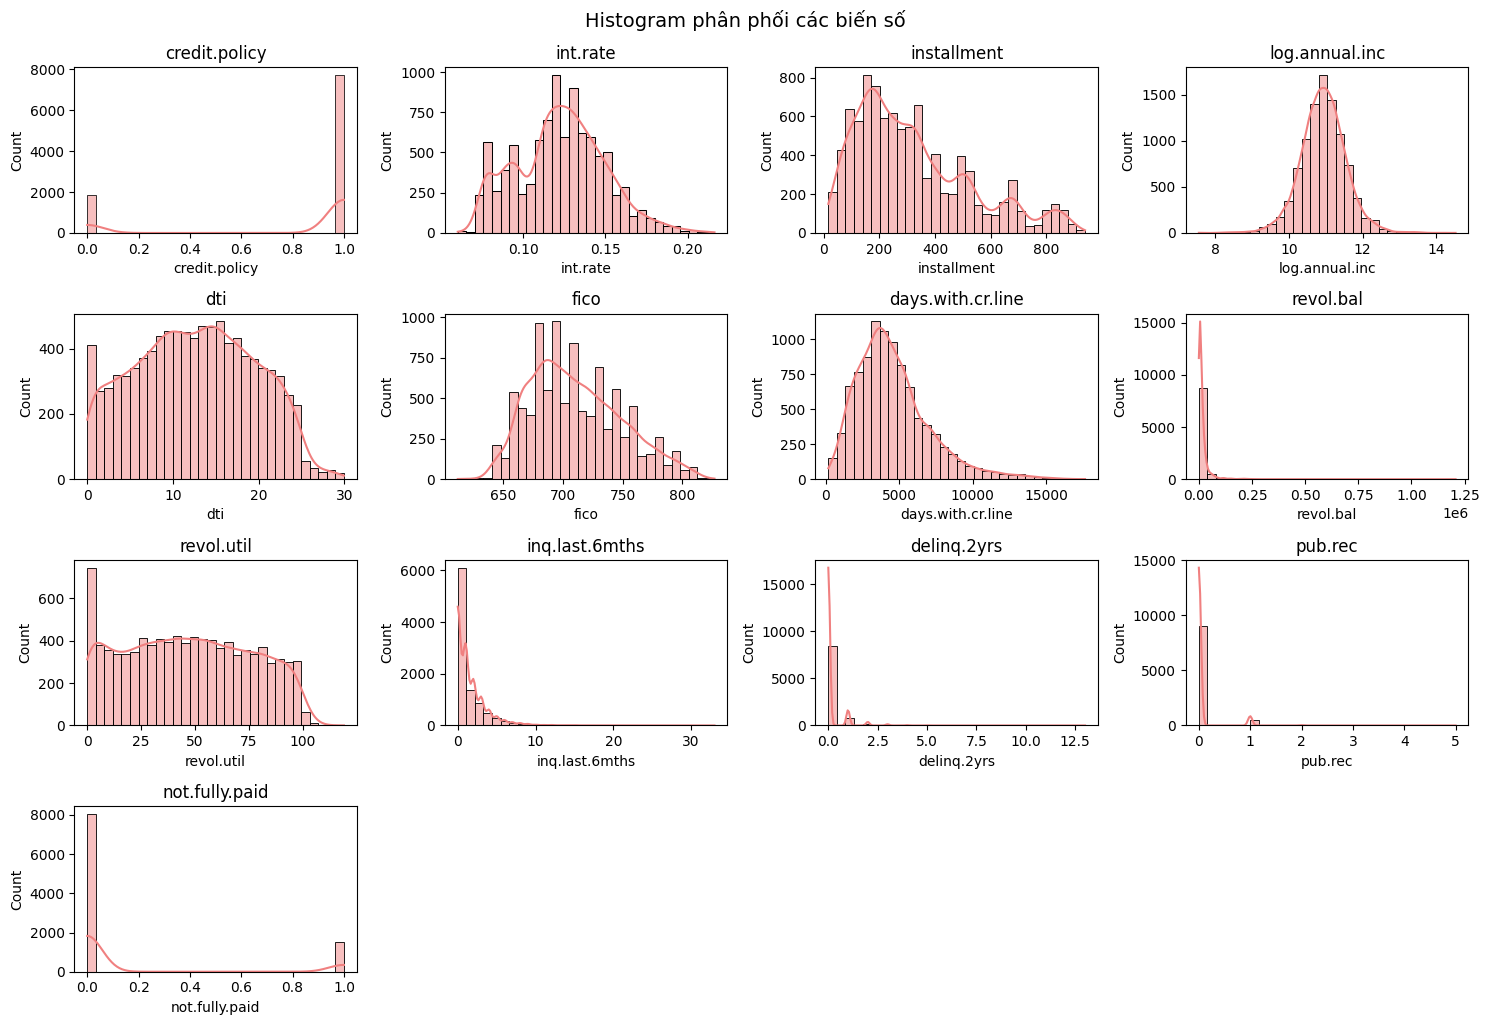

In [9]:
#Kiểm tra sơ bộ bằng Histogram
# Lấy danh sách các biến số
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Xác định số hàng và cột hiển thị
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(15, 10))
# Lặp qua từng biến số để vẽ histogram
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color='lightcoral')
    plt.title(col)
    plt.tight_layout()
# Tiêu đề chung
plt.suptitle("Histogram phân phối các biến số", fontsize=14, y=1.02)
plt.show()

In [10]:
from sklearn.neighbors import LocalOutlierFactor
df_clean = df.copy()

# 1.Định nghĩa các cột số liên tục để áp dụng LOF
# LOF chỉ áp dụng cho các cột số. Loại trừ 'purpose' (object) và các cột nhị phân/đếm rời rạc.
numerical_cols_for_lof = [
    'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
    'days.with.cr.line', 'revol.bal', 'revol.util'
]

# Trích xuất các cột cần áp dụng
X = df_clean[numerical_cols_for_lof]

# 2. Khởi tạo và Huấn luyện mô hình LOF
# contamination=0.05 giả định 5% dữ liệu là ngoại lai.
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# fit_predict trả về mảng: -1 cho outliers (ngoại lai), 1 cho inliers
outlier_labels = lof.fit_predict(X)

# 3. Thêm nhãn vào DataFrame
df_clean['lof_label'] = outlier_labels

# 4. Xác định và xóa các hàng ngoại lai
outliers_count = len(df_clean[df_clean['lof_label'] == -1])
print(f"Tổng số hàng được LOF xác định là ngoại lai (chỉ dựa trên các cột số): {outliers_count}")

# Xóa các hàng ngoại lai (chỉ giữ lại những hàng có nhãn 1)
df_cleaned = df_clean[df_clean['lof_label'] == 1].drop(columns=['lof_label'])

# 5. Kiểm tra kích thước DataFrame sau khi làm sạch
print(f"Kích thước DataFrame gốc (df): {df.shape}")
print(f"Kích thước DataFrame sau khi loại bỏ ngoại lai:{df_cleaned.shape}")


Tổng số hàng được LOF xác định là ngoại lai (chỉ dựa trên các cột số): 958
Kích thước DataFrame gốc (df): (9578, 14)
Kích thước DataFrame sau khi loại bỏ ngoại lai:(8620, 14)


### 2.2. Rút gọn dữ liệu
 Với bộ dữ liệu chứa 8620 quan sát, số lượng này đủ lớn để sử dụng trong quá xây dựng và đánh giá mô hình. Vậy nên nhóm quyết định không thực hiện bước rút gọn dữ liệu này.


### 2.3. Tích hợp dữ liệu
 Qua quá trình đánh giá, nhóm kết luận rằng bộ dữ liệu gồm 8620 quan sát, không tồn tại giá trị bị thiếu đã đáp ứng đủ các tiêu chí về chất lượng và số lượng để tiến hành phân tích. Việc bổ sung thêm dữ liệu vào thời điểm này có thể gây ra tình trạng nhiễu dữ liệu, ảnh hưởng đến độ tin cậy của kết quả nghiên cứu. Vì vậy, nhóm quyết định không tích hợp thêm dữ liệu.


### 2.4 Mã hóa dữ liệu

In [11]:
# 1. Thực hiện One-Hot Encoding cho cột 'purpose'
# drop_first=True loại bỏ một cột danh mục để tránh đa cộng tuyến.
purpose_dummies = pd.get_dummies(df_cleaned['purpose'], prefix='purpose', drop_first=True)

# 2. Gộp các cột mới đã mã hóa vào DataFrame và loại bỏ cột 'purpose' gốc
df_encoded = pd.concat([df_cleaned.drop('purpose', axis=1), purpose_dummies], axis=1)

# 3. Kiểm tra kích thước và 5 hàng đầu tiên
print(f"Kích thước DataFrame gốc (df_cleaned): {df_cleaned.shape}")
print(f"Kích thước DataFrame sau khi mã hóa: {df_encoded.shape}")
print("\n5 Hàng đầu tiên của DataFrame đã được mã hóa:")
df_encoded.head()

Kích thước DataFrame gốc (df_cleaned): (8620, 14)
Kích thước DataFrame sau khi mã hóa: (8620, 19)

5 Hàng đầu tiên của DataFrame đã được mã hóa:


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,True,False,False,False,False,False
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,False,True,False,False,False,False


### 2.5. Chuẩn hóa dữ liệu

In [12]:
# Import StandardScaler để chuẩn hóa dữ liệu số liên tục
from sklearn.preprocessing import StandardScaler
# 1. Định nghĩa các nhóm cột
# Các biến số liên tục CẦN CHUẨN HÓA (từ phân tích Histogram)
cols_to_scale = [
    'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
    'days.with.cr.line', 'revol.bal', 'revol.util'
]

# Tách riêng các cột cần chuẩn hóa
Y_to_scale = df_encoded[cols_to_scale]

# Các cột nhị phân/đếm RỜI RẠC/ĐÃ MÃ HÓA (GIỮ NGUYÊN)
# Bao gồm các biến 0/1, biến đếm và các cột 'purpose_' đã được mã hóa.
cols_to_keep = [col for col in df_encoded.columns if col not in cols_to_scale]
Y_non_scaled = df_encoded[cols_to_keep]

# 2. Tiến hành Chuẩn hóa (Standard Scaling)
scaler = StandardScaler()

# Huấn luyện và biến đổi chỉ trên các cột số liên tục
Y_scaled_array = scaler.fit_transform(Y_to_scale)

# Chuyển mảng kết quả về lại DataFrame
Y_scaled_df = pd.DataFrame(
    Y_scaled_array,
    columns=Y_to_scale.columns,
    index=Y_to_scale.index
)

# 3. Gộp các biến đã chuẩn hóa và các biến được giữ nguyên
# Kết hợp 2 DataFrame đã xử lý
df_final_scaled = pd.concat([Y_scaled_df, Y_non_scaled], axis=1)

# 4. Kiểm tra kết quả
print(f"Kích thước DataFrame cuối cùng: {df_final_scaled.shape}")
print("\n5 hàng đầu tiên (kiểm tra các cột số đã được chuẩn hóa):")
df_final_scaled.head()

Kích thước DataFrame cuối cùng: (8620, 19)

5 hàng đầu tiên (kiểm tra các cột số đã được chuẩn hóa):


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.100786,2.794709,0.731371,0.984714,0.703953,0.515288,0.555506,0.168593,1,0,0,0,0,False,True,False,False,False,False
2,0.531035,0.363075,-0.879439,-0.161799,-0.764280,0.099773,-0.500370,-0.750382,1,1,0,0,0,False,True,False,False,False,False
4,0.790533,-1.025392,0.647816,0.326016,-1.164708,-0.187973,-0.449166,-0.268353,1,0,1,0,0,True,False,False,False,False,False
5,-1.608884,-0.908556,1.645772,0.619582,0.437001,0.729795,1.470143,0.130447,1,0,0,0,0,True,False,False,False,False,False
6,1.053792,-0.546157,-0.317294,-1.276181,-1.164708,-0.583829,-0.486705,1.025147,1,0,0,1,1,False,True,False,False,False,False


In [13]:
# Xuất file CSV
file_name_cleaned = 'loan_data_cleaned_only.csv'
df_cleaned.to_csv(file_name_cleaned, index=False)

file_name_scaled = 'loan_data_final_scaled.csv'
df_final_scaled.to_csv(file_name_scaled, index=False)
files.download('loan_data_cleaned_only.csv')
files.download('loan_data_final_scaled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3. Phân tích EDA

### 3.1 Import thư viện, đọc dữ liệu và hiển thị dữ liệu

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập hiển thị
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid", palette="pastel")

In [15]:
df_cleaned.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.119,829.100,11.350,19.480,737,5639.958,28854,52.100,0,0,0,0
2,1,debt_consolidation,0.136,366.860,10.373,11.630,682,4710.000,3511,25.600,1,0,0,0
4,1,credit_card,0.143,102.920,11.300,14.970,667,4066.000,4740,39.500,0,1,0,0
5,1,credit_card,0.079,125.130,11.905,16.980,727,6120.042,50807,51.000,0,0,0,0
6,1,debt_consolidation,0.150,194.020,10.714,4.000,667,3180.042,3839,76.800,0,0,1,1


### 3.2. Thống kê mô tả

In [16]:
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

desc_stats = df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max']).T
desc_stats = desc_stats.rename(columns={
    'mean': 'Trung bình',
    'median': 'Trung vị',
    'std': 'Độ lệch chuẩn',
    'min': 'Giá trị nhỏ nhất',
    'max': 'Giá trị lớn nhất'
})
desc_stats


,Trung bình,Trung vị,Độ lệch chuẩn,Giá trị nhỏ nhất,Giá trị lớn nhất
credit.policy,0.805,1.000,0.396,0.000,1.000
int.rate,0.123,0.122,0.027,0.060,0.216
installment,319.089,268.950,207.071,15.670,940.140
log.annual.inc,10.932,10.929,0.615,7.548,14.528
dti,12.607,12.665,6.884,0.000,29.960
fico,710.846,707.000,37.971,612.000,827.000
days.with.cr.line,4560.767,4139.958,2496.930,178.958,17639.958
revol.bal,16913.964,8596.000,33756.190,0.000,1207359.000
revol.util,46.799,46.300,29.014,0.000,119.000
inq.last.6mths,1.577,1.000,2.200,0.000,33.000


### 3.3. Phân bố các biến mục tiêu

,Số lượng,Tỷ lệ (%)
not.fully.paid,,
0,7282,84.478
1,1338,15.522


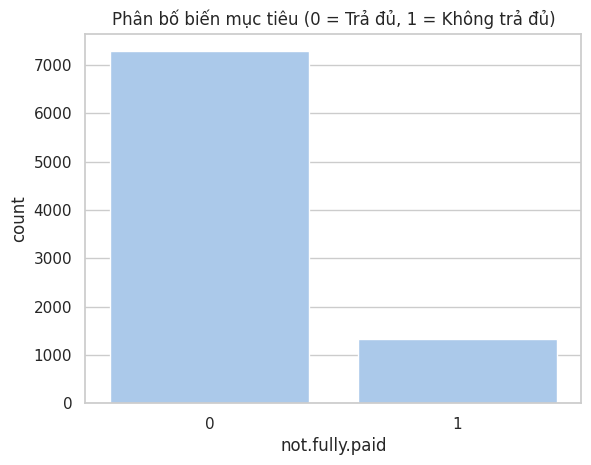

In [17]:
target_counts = df_cleaned['not.fully.paid'].value_counts()
target_ratio = df_cleaned['not.fully.paid'].value_counts(normalize=True) * 100

display(pd.concat([target_counts, target_ratio], axis=1, keys=['Số lượng', 'Tỷ lệ (%)']))

sns.countplot(x='not.fully.paid', data=df_cleaned)
plt.title("Phân bố biến mục tiêu (0 = Trả đủ, 1 = Không trả đủ)")
plt.show()

### 3.4. Phân bố các biến định lượng chính

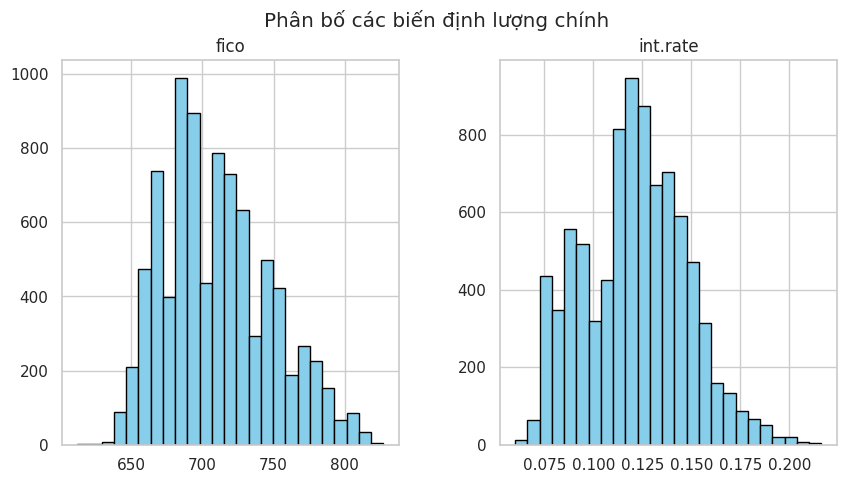

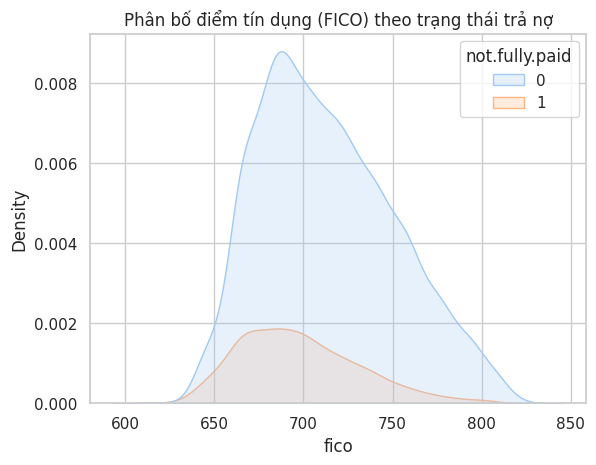

In [18]:
num_vars = ['fico', 'int.rate']

df_cleaned[num_vars].hist(figsize=(10,5), bins=25, color='skyblue', edgecolor='black')
plt.suptitle("Phân bố các biến định lượng chính")
plt.show()

sns.kdeplot(data=df, x='fico', hue='not.fully.paid', fill=True)
plt.title("Phân bố điểm tín dụng (FICO) theo trạng thái trả nợ")
plt.show()

### 3.5. Phân tích đặc điểm biến định tính

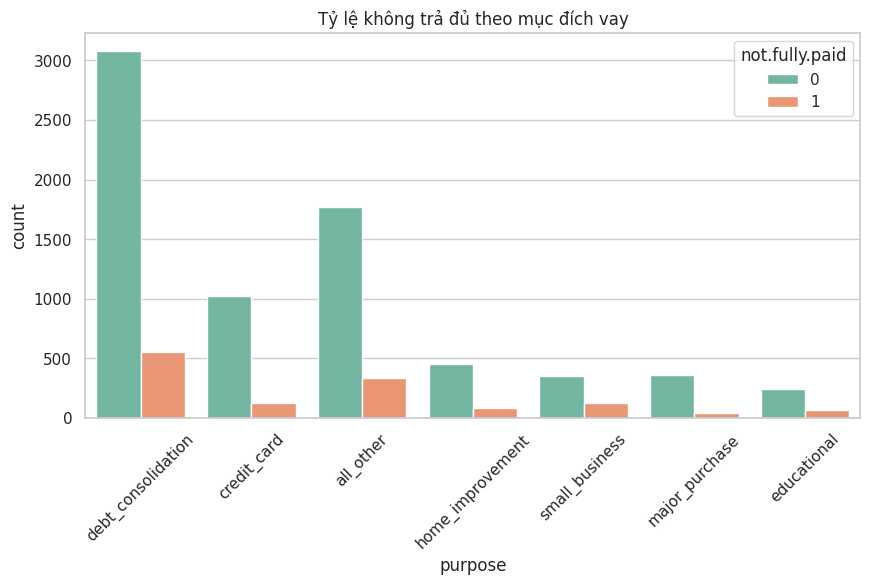

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', hue='not.fully.paid', data=df_cleaned, palette='Set2')
plt.title("Tỷ lệ không trả đủ theo mục đích vay")
plt.xticks(rotation=45)
plt.show()

### 3.6. Phân tích mối quan hệ giữa cá biến định lượng

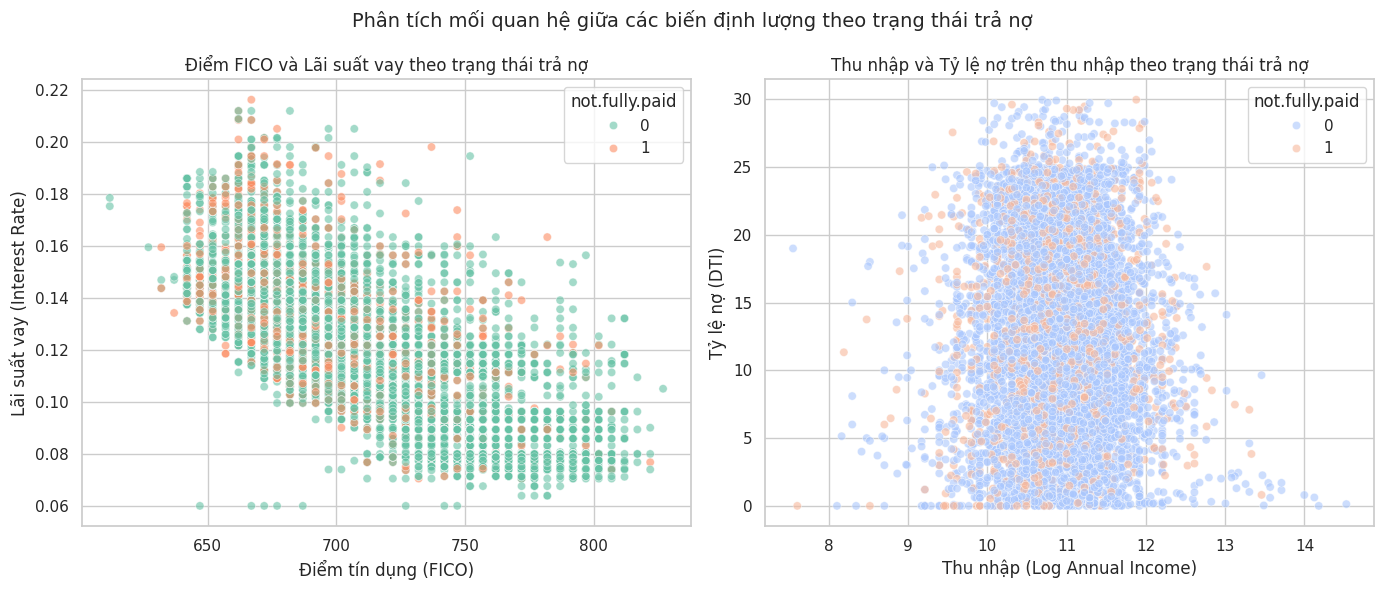

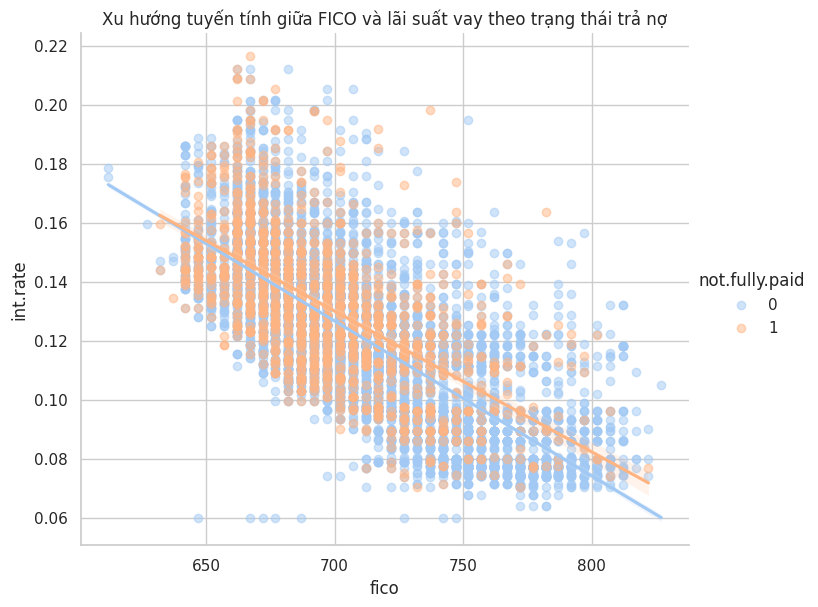

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Biểu đồ 1: FICO vs Interest Rate
sns.scatterplot(
    data=df_cleaned,
    x='fico',
    y='int.rate',
    hue='not.fully.paid',
    alpha=0.6,
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title("Điểm FICO và Lãi suất vay theo trạng thái trả nợ")
axes[0].set_xlabel("Điểm tín dụng (FICO)")
axes[0].set_ylabel("Lãi suất vay (Interest Rate)")

# Biểu đồ 2: Log Annual Income vs DTI
sns.scatterplot(
    data=df_cleaned,
    x='log.annual.inc',
    y='dti',
    hue='not.fully.paid',
    alpha=0.6,
    palette='coolwarm',
    ax=axes[1]
)
axes[1].set_title("Thu nhập và Tỷ lệ nợ trên thu nhập theo trạng thái trả nợ")
axes[1].set_xlabel("Thu nhập (Log Annual Income)")
axes[1].set_ylabel("Tỷ lệ nợ (DTI)")

plt.suptitle("Phân tích mối quan hệ giữa các biến định lượng theo trạng thái trả nợ", fontsize=14)
plt.tight_layout()
plt.show()

# Biểu đồ 3: Xu hướng tuyến tính giữa FICO và Interest Rate
sns.lmplot(
    data=df_cleaned,
    x='fico',
    y='int.rate',
    hue='not.fully.paid',
    height=6,
    aspect=1.2,
    scatter_kws={'alpha':0.5}
)
plt.title("Xu hướng tuyến tính giữa FICO và lãi suất vay theo trạng thái trả nợ")
plt.show()

### 3.7. Thiết lập ma trận tương quan

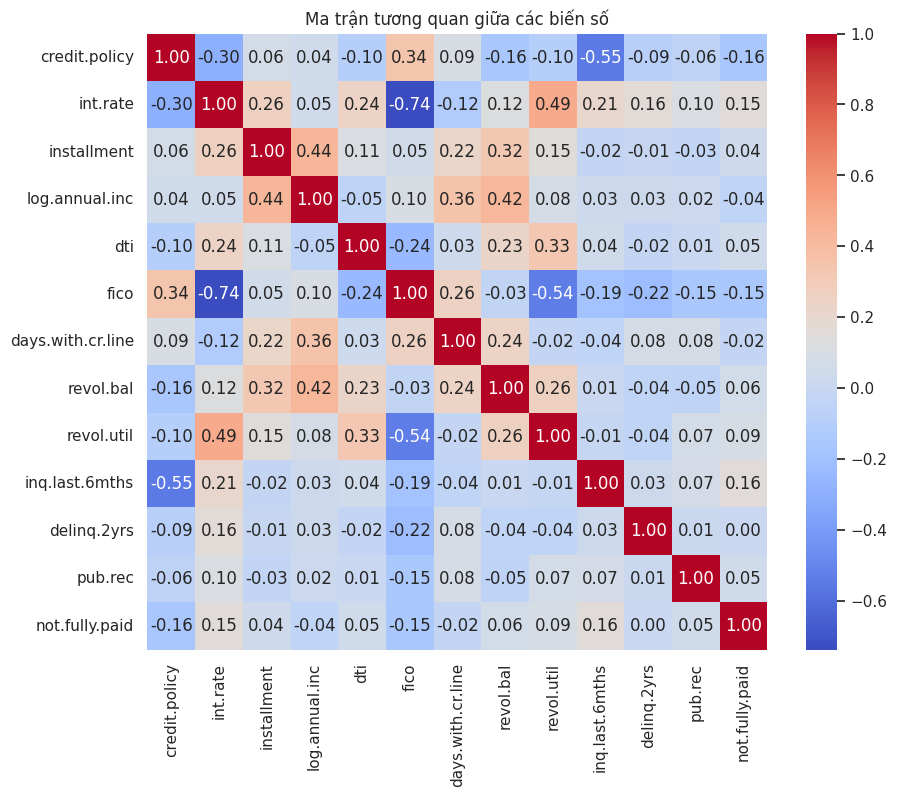

,not.fully.paid
not.fully.paid,1.000
inq.last.6mths,0.156
int.rate,0.155
revol.util,0.087
revol.bal,0.057
dti,0.048
pub.rec,0.046
installment,0.038
delinq.2yrs,0.004
days.with.cr.line,-0.022


In [21]:
corr = df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

corr['not.fully.paid'].sort_values(ascending=False)

### 3.8. Phân tích các yếu tố ảnh hưởng đến khả năng trả nợ

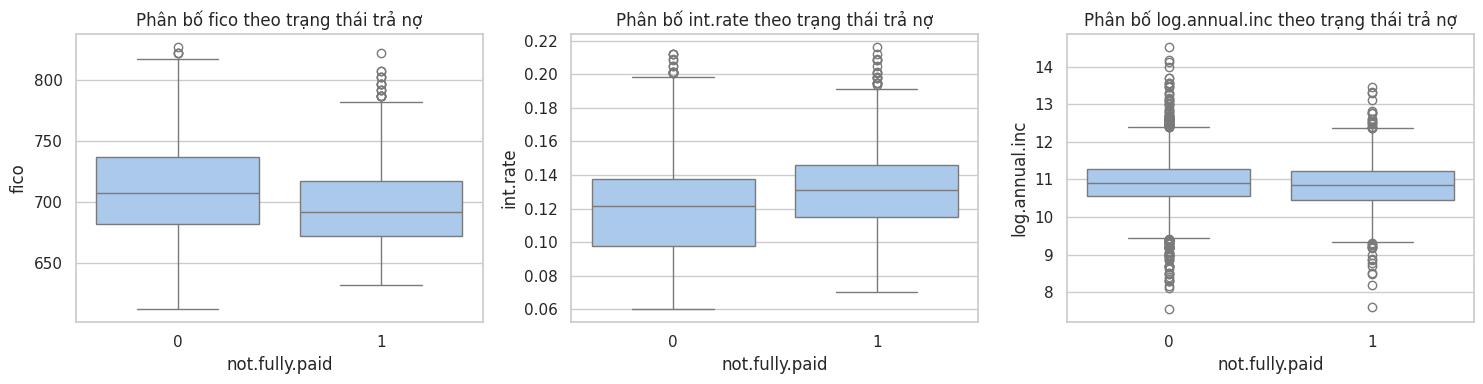

In [22]:
plt.figure(figsize=(15,4))
for i, col in enumerate(['fico', 'int.rate', 'log.annual.inc'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='not.fully.paid', y=col, data=df_cleaned)
    plt.title(f'Phân bố {col} theo trạng thái trả nợ')
plt.tight_layout()
plt.show()

,not.fully.paid
purpose,
small_business,0.266
educational,0.211
all_other,0.161
home_improvement,0.159
debt_consolidation,0.152
major_purchase,0.109
credit_card,0.109


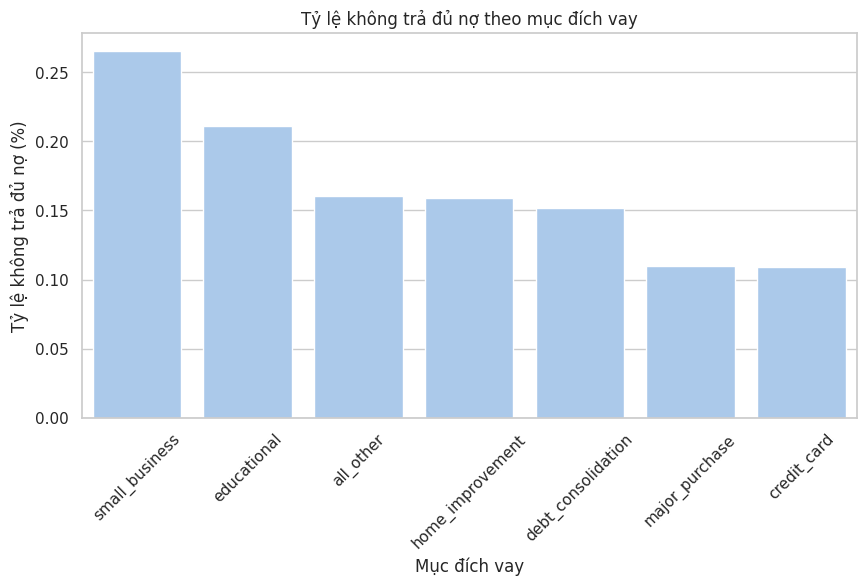

In [23]:
purpose_risk = df_cleaned.groupby('purpose')['not.fully.paid'].mean().sort_values(ascending=False)

display(purpose_risk)

plt.figure(figsize=(10,5))
sns.barplot(x=purpose_risk.index, y=purpose_risk.values)
plt.xticks(rotation=45)
plt.title("Tỷ lệ không trả đủ nợ theo mục đích vay")
plt.ylabel("Tỷ lệ không trả đủ nợ (%)")
plt.xlabel("Mục đích vay")
plt.show()

## **4. Phân lớp**

### 4.1 Kiểm tra tình trạng mất cân bằng dữ liệu

In [24]:
import os
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

print("Dữ liệu:", df_final_scaled.shape)

Dữ liệu: (8620, 19)


<Axes: xlabel='not.fully.paid'>

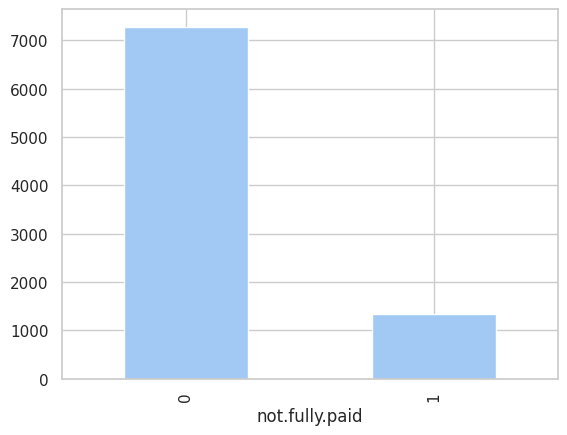

In [26]:
df_final_scaled['not.fully.paid'].value_counts().plot(kind="bar")

### 4.2. Chọn Phương pháp xử lý bất cân bằng

#### 4.2.1. Chạy với dữ liệu ban đầu

In [28]:
# Train model voi imabalance data
from sklearn.linear_model import LogisticRegression
target = 'not.fully.paid'
X = df_final_scaled.drop(columns=[target])
y = df_final_scaled[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Khoi tao
model = LogisticRegression()

# Fit voi du lieu trian
model.fit(X_train, y_train)

# Du doan du lieu test
y_pred = model.predict(X_test)

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1456
           1       0.59      0.04      0.07       268

    accuracy                           0.85      1724
   macro avg       0.72      0.52      0.49      1724
weighted avg       0.81      0.85      0.78      1724



#### 4.2.2. Under Sampling (RUS)

In [29]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample training data
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_rus.shape)

Original training set shape: (6896, 18)
Resampled training set shape: (2140, 18)


In [30]:
from sklearn.linear_model import LogisticRegression

# Khoi tao model Logistic Regression
model_rus = LogisticRegression()

# Fit voi du lieu training da undersampling
model_rus.fit(X_train_rus, y_train_rus)

# Du doan tren du lieu test
y_pred_rus = model_rus.predict(X_test)

# In ket qua
print_scores(y_test, y_pred_rus)

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1456
           1       0.22      0.56      0.32       268

    accuracy                           0.63      1724
   macro avg       0.55      0.60      0.53      1724
weighted avg       0.78      0.63      0.68      1724



#### 4.2.3. Nearmiss(INS)

In [31]:
from imblearn.under_sampling import NearMiss

# Instantiate NearMiss
nm = NearMiss(version=1)

# Resample training data
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape with NearMiss:", X_train_nm.shape)

Original training set shape: (6896, 18)
Resampled training set shape with NearMiss: (2140, 18)


In [33]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
model_nm = LogisticRegression()

# Fit the model to the NearMiss resampled training data
model_nm.fit(X_train_nm, y_train_nm)

# Predict on the test set
y_pred_nm = model_nm.predict(X_test)

# Print the evaluation scores
print_scores(y_test, y_pred_nm)

              precision    recall  f1-score   support

           0       0.91      0.40      0.56      1456
           1       0.19      0.77      0.31       268

    accuracy                           0.46      1724
   macro avg       0.55      0.59      0.43      1724
weighted avg       0.79      0.46      0.52      1724



#### 4.2.4. Random Oversampling (ROS)

In [34]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample training data
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape with RandomOverSampler:", X_train_ros.shape)

Original training set shape: (6896, 18)
Resampled training set shape with RandomOverSampler: (11652, 18)


In [35]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
model_ros = LogisticRegression()

# Fit the model to the RandomOverSampler resampled training data
model_ros.fit(X_train_ros, y_train_ros)

# Predict on the test set
y_pred_ros = model_ros.predict(X_test)

# Print the evaluation scores
print_scores(y_test, y_pred_ros)

              precision    recall  f1-score   support

           0       0.89      0.64      0.75      1456
           1       0.23      0.58      0.33       268

    accuracy                           0.63      1724
   macro avg       0.56      0.61      0.54      1724
weighted avg       0.79      0.63      0.68      1724



#### 4.2.5. SMOTE

In [36]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape with SMOTE:", X_train_smote.shape)

Original training set shape: (6896, 18)
Resampled training set shape with SMOTE: (11652, 18)


In [37]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
model_smote = LogisticRegression()

# Fit the model to the SMOTE resampled training data
model_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_smote = model_smote.predict(X_test)

# Print the evaluation scores
print_scores(y_test, y_pred_smote)

              precision    recall  f1-score   support

           0       0.88      0.66      0.75      1456
           1       0.21      0.49      0.29       268

    accuracy                           0.63      1724
   macro avg       0.54      0.57      0.52      1724
weighted avg       0.77      0.63      0.68      1724



#### 4.2.6. Class weight

In [38]:
# Train model voi imabalance data

# Khoi tao
model = LogisticRegression(class_weight="balanced")

# Fit voi du lieu trian
model.fit(X_train, y_train)

# Du doan du lieu test
y_pred = model.predict(X_test)

# in ra ket qua
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1456
           1       0.23      0.57      0.33       268

    accuracy                           0.63      1724
   macro avg       0.56      0.61      0.54      1724
weighted avg       0.79      0.63      0.68      1724



### 4.3. Thực hiên phân lớp

#### **4.3.1 Phương pháp XGboost**

**Bước 1: Import thư viện và tải dữ liệu**

In [40]:
import os
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

print("Dữ liệu:", df_final_scaled.shape)
df_final_scaled.head()


Dữ liệu: (8620, 19)


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.101,2.795,0.731,0.985,0.704,0.515,0.556,0.169,1,0,0,0,0,False,True,False,False,False,False
2,0.531,0.363,-0.879,-0.162,-0.764,0.100,-0.500,-0.750,1,1,0,0,0,False,True,False,False,False,False
4,0.791,-1.025,0.648,0.326,-1.165,-0.188,-0.449,-0.268,1,0,1,0,0,True,False,False,False,False,False
5,-1.609,-0.909,1.646,0.620,0.437,0.730,1.470,0.130,1,0,0,0,0,True,False,False,False,False,False
6,1.054,-0.546,-0.317,-1.276,-1.165,-0.584,-0.487,1.025,1,0,0,1,1,False,True,False,False,False,False


**Bước 2: Chuẩn bị dữ liệu và cân bằng lớp**

In [41]:
target = 'not.fully.paid'
X = df_final_scaled.drop(columns=[target])
y = df_final_scaled[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Cân bằng lớp xong. Số mẫu train:", len(X_train_res))

Cân bằng lớp xong. Số mẫu train: 11652


**Bước 3: Huấn luyện mô hình XGBoost và tối ưu tham số**

In [42]:
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [3, 4],
    'learning_rate': [0.03, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(
    xgb, param_grid,
    scoring='f1', cv=3, n_jobs=-1, verbose=0
)
grid.fit(X_train_res, y_train_res)
best_model = grid.best_estimator_

print("Best params:", grid.best_params_)

Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}


**Bước 4: Đánh giá mô hình và phân tích kết quả**

Accuracy: 0.780  |  ROC AUC: 0.620

=== Báo cáo phân lớp ===
              precision    recall  f1-score   support

           0      0.859     0.885     0.872      1456
           1      0.251     0.209     0.228       268

    accuracy                          0.780      1724
   macro avg      0.555     0.547     0.550      1724
weighted avg      0.764     0.780     0.772      1724



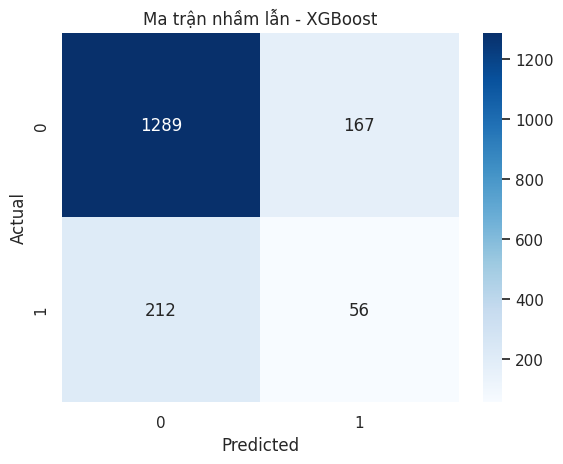

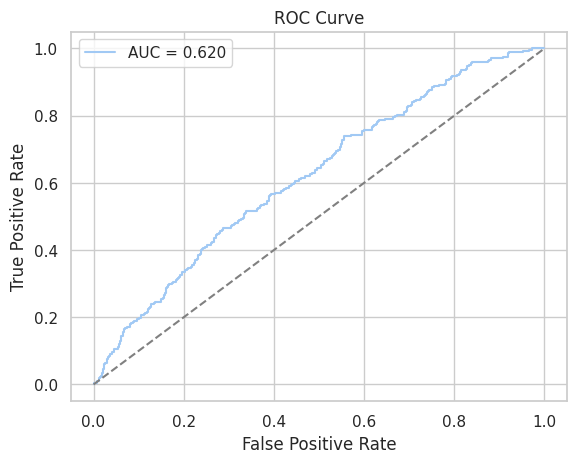


Top 10 đặc trưng quan trọng nhất:
                       Feature  Importance
8                credit.policy       0.204
4                         fico       0.108
12         purpose_credit_card       0.074
0                     int.rate       0.072
10                 delinq.2yrs       0.063
17      purpose_small_business       0.059
13  purpose_debt_consolidation       0.050
15    purpose_home_improvement       0.050
14         purpose_educational       0.046
11                     pub.rec       0.040


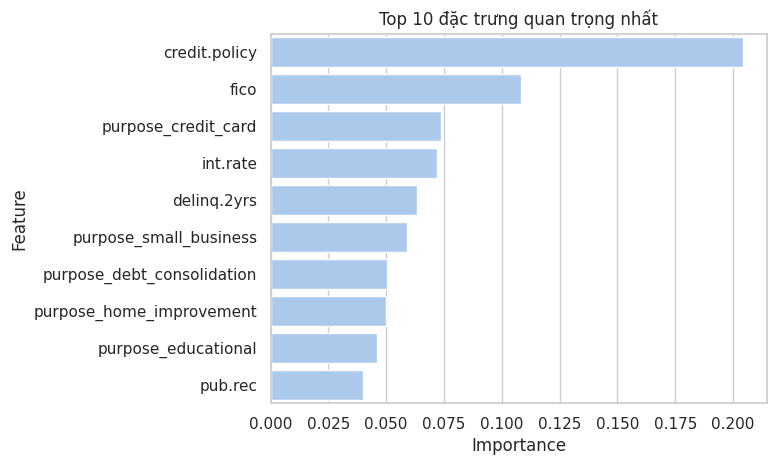

In [43]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Tính các chỉ số cơ bản
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {acc:.3f}  |  ROC AUC: {roc:.3f}\n")

# Báo cáo chi tiết precision, recall, F1-score
print("=== Báo cáo phân lớp ===")
print(classification_report(y_test, y_pred, digits=3))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Ma trận nhầm lẫn - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc:.3f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Tầm quan trọng của các đặc trưng (Feature Importance)
fi = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 đặc trưng quan trọng nhất:")
print(fi.head(10))

sns.barplot(data=fi.head(10), x='Importance', y='Feature')
plt.title("Top 10 đặc trưng quan trọng nhất")
plt.show()


### **4.3.2. Phương pháp Random Forest**

**Bước 1: Import các thư viện cần thiết**

In [44]:
from sklearn.ensemble import RandomForestClassifier

**Bước 2: Chuẩn bị dữ liệu và cân bằng lớp**

In [45]:
target = 'not.fully.paid'
X = df_final_scaled.drop(columns=[target])
y = df_final_scaled[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cân bằng dữ liệu bằng kỹ thuật SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Cân bằng lớp xong. Số mẫu train:", len(X_train_res))

Cân bằng lớp xong. Số mẫu train: 11652


**Bước 3: Huấn luyện mô hình Random Forest và tối ưu tham số**

In [46]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    rf, param_grid,
    scoring='f1', cv=3, n_jobs=-1, verbose=0
)
grid.fit(X_train_res, y_train_res)

best_rf = grid.best_estimator_

print("Best params:", grid.best_params_)

Best params: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Bước 4: Đánh giá mô hình và trực quan hóa kết quả**

Accuracy: 0.639  |  ROC AUC: 0.639

=== Báo cáo phân lớp - Random Forest ===
              precision    recall  f1-score   support

           0      0.879     0.663     0.756      1456
           1      0.216     0.504     0.302       268

    accuracy                          0.639      1724
   macro avg      0.547     0.584     0.529      1724
weighted avg      0.776     0.639     0.686      1724



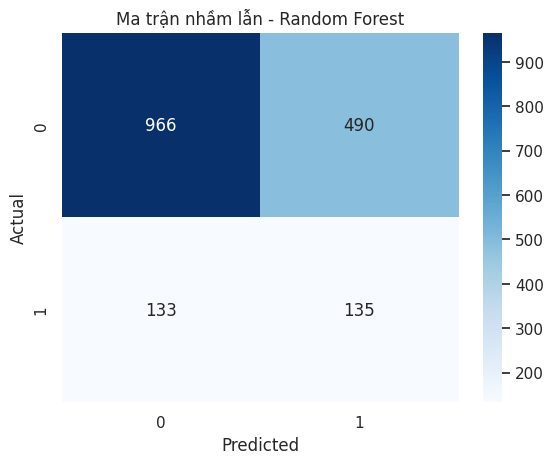

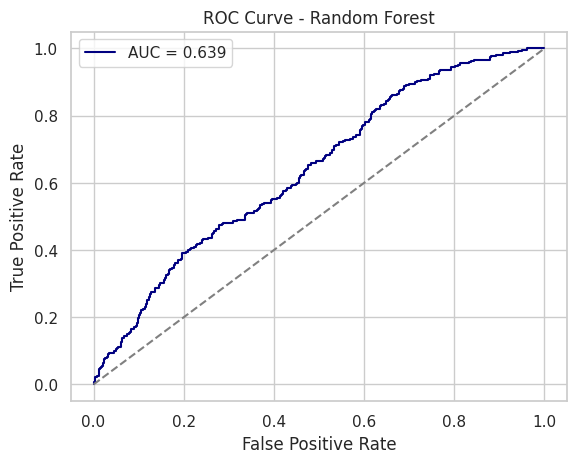


Top 10 đặc trưng quan trọng nhất:
                       Feature  Importance
0                     int.rate       0.210
4                         fico       0.198
8                credit.policy       0.133
7                   revol.util       0.064
2               log.annual.inc       0.054
9               inq.last.6mths       0.054
5            days.with.cr.line       0.045
1                  installment       0.043
13  purpose_debt_consolidation       0.040
17      purpose_small_business       0.034


/tmp/ipython-input-392610956.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_rf.head(10), x='Importance', y='Feature', palette='crest')


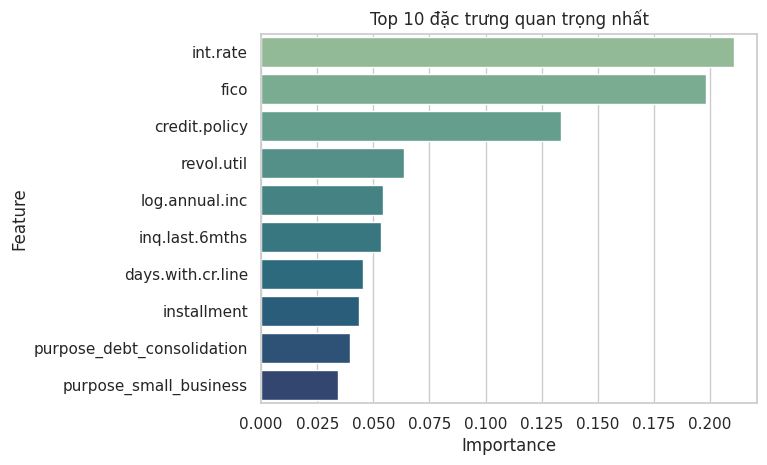

In [47]:
# === Dự đoán trên tập kiểm định ===
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# === Tính các chỉ số đánh giá ===
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Accuracy: {acc_rf:.3f}  |  ROC AUC: {roc_rf:.3f}\n")

# === Báo cáo chi tiết precision, recall, F1-score ===
print("=== Báo cáo phân lớp - Random Forest ===")
print(classification_report(y_test, y_pred_rf, digits=3))

# === Ma trận nhầm lẫn (Confusion Matrix) ===
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Ma trận nhầm lẫn - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === Đường cong ROC ===
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_rf:.3f}', color='navy')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# === Độ quan trọng của các đặc trưng ===
fi_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 đặc trưng quan trọng nhất:")
print(fi_rf.head(10))

sns.barplot(data=fi_rf.head(10), x='Importance', y='Feature', palette='crest')
plt.title("Top 10 đặc trưng quan trọng nhất")
plt.show()